# 用户指南，第2章：音符
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_02_notes.html)

符号音乐（Notated music），顾名思义，由一系列在时间上先后出现的音符（note）组成。除此之外，符号音乐还包含谱号，调号，连音符等其他信息。但是，音符是符号音乐的核心。所以，在开始探索music21前，先介绍music21如何处理音符。

打开IDLE，或者在命令行输入`python`以开始。

## 创建与处理音符
music21中，一个标准的音符由`music21.note.Note`对象表示

**Python新手请注意**（其他用户可跳过）：模块名和对象名不同。Python模块（可含有一个，多个，或不含有对象），永远以小写字母开头。Music21的对象以大写字母开头。所以，`Note`对象包含在`note`模块中。Python严格区分大小写。

note模块中还有其他类。最重要的是`note.Rest`，表示休止符。

用以下命令载入music21库:

In [1]:
from music21 import *

然后即可输入`note`，以访问`note`模块

In [2]:
note

<module 'music21.note' from 'E:\\repos\\music21\\music21\\note.py'>

如果想知道note模块中还有哪些内容，输入`dir(note)`

In [3]:
dir(note)

['GeneralNote',
 'Lyric',
 'LyricException',
 'NotRest',
 'NotRestException',
 'Note',
 'NoteException',
 'Rest',
 'SYLLABIC_CHOICES',
 'Unpitched',
 'noteheadTypeNames',
 'stemDirectionNames']

这个列表中的部分内容是音符类。其他类我们后面将会介绍，例如Lyric对象。

### (题外话)

如果害怕污染命名空间，可以输入：

In [4]:
import music21

那么，你需要用`music21.note`来访问note类（而不是`note`）

In [5]:
music21.note

<module 'music21.note' from 'E:\\repos\\music21\\music21\\note.py'>

### （回归正题）
创建一个音高为F5的note.Note对象

In [6]:
f=note.Note("F5")

music21中，中央C是C4，比它高一个八度的是C5。

现在你有了一个音符，它在哪里？它储存在变量f里面。输入`f`即可访问

In [7]:
f

<music21.note.Note F>

用`.name`和`.octave`，可以确认，它确实是第5个八度上的F

In [8]:
f.name

'F'

In [9]:
f.octave

5

Note的另一个属性是音高`.pitch`，它返回一个`Pitch`对象

In [10]:
f.pitch

<music21.pitch.Pitch F5>

Pitch对象能够获取关于音高的更多信息，例如频率`.frequency`

In [11]:
f.pitch.frequency

698.456462866008

还有`.pitchClassString`（字符串形式的八度编号）

In [12]:
f.pitch.pitchClassString

'5'

所以，f是大约698hz（如果A4=440hz），而且是第5八度（C=0，C#=D-=1，依此类推）

需要注意到几点：
1. 你的电脑显示的`frequency`可能比本文档拥有更多的小数位数。在本文档中，我们有时候会写"..."，而不是列出所有小数位数。这是因为，数字的长度，甚至最后几位数的具体数值，会随python位数为32位或64位，系统为Mac或Windows而异。得到略微不同的结果是正常现象。
2. 有些输出是用单引号包住的（像`f.name`的`'F'`），另一些没有单引号（像`f.octave`的`5`）。有单引号的输出说明返回值是字符串，没有单引号说明返回值是数值（要么是整数，要么，如果有小数点的话，一个卑鄙地模仿小数的东西，叫做浮点数`float`。它大部分看起来，表现起来都像个小数，但有时又不像，你永远预测不到）
   
*(说到`float`背后的历史和原理，任何一个计算机科学家都能和你讲上一大箩筐，通常当ta是站在你和吧台之间的唯一一样东西的时候。真的，我们不应该继续用`float`，除非考虑到我们的电脑算`float`远快于算`decimal`)*

> 译注：上面这一段是原作者关于二进制浮点数`float`的暴论，很大可能来源于工程实践中的以讹传讹。而我认为，如果浮点数真这么一无是处的话，像Python这种以降低使用难度为核心设计思想，并愿意为之牺牲性能的编程语言，就不会把`float`作为基本类型了，而是采用`decimal`作为基本类型，把`float`作为高性能计算的扩展类型。况且，本案例中的频率是无理数，即便用十进制浮点数`decimal`也无法精确表示。而对于绝大多数使用场景来说，`float`的精度绰绰有余。所以，我们大可放心使用`float`，并**仅**在需要使数值**精确地等于一个十进制小数**时，才做特殊处理，例如用整型的123分来表示1.23元。
> 
> 关于这一话题的更多讨论，参见这个[知乎问题](https://www.zhihu.com/question/65960911/answer/237638982)

字符串`'5'`和数值`5`不一样。在Python中，我们用双等号（`==`）来判断两个对象是否“相等”。所以

In [13]:
f.octave==5

True

结果正如我们所预料。但是

In [14]:
f.pitch.pitchClassString == 5

False

这是由于在Python语言中，数值`5`和字符串`"5"`不相等。（有些编程语言，例如JavaScript和Perl认为它们相等，但Python不是。一开始你可能会觉得这不方便，但是随着学习的深入，你会发现这一设计的好处）。

所以，如果要判断`f.pitchClassString`是`'5'`，我们要用引号把它变成字符串：

In [15]:
f.pitch.pitchClassString == "5"

True

Python中，用单引号和双引号来表示字符串都可以

In [16]:
f.pitch.pitchClassString == '5'

True

`pitchClassString`这个名字告诉你，它输出的应该是个字符串。另有一个`pitchClass`输出的是数值：

In [17]:
f.pitch.pitchClass

5

对于音高`F`来说，这两种获取pitch class的方式返回了大致相同的结果，唯一区别是：一个是整数，一个是字符串。但是对于`B-`来说，`pitchClass`是10，而`pitchClassString`是`"A"`，是不同的。

我们来创建一个`B-`音符。在music21中，升调符号是`"#"`。但是，降调符号是`"-"`而不是`"b"`。这是因为`"b"`会与音名`"b"`冲突。

In [18]:
bflat = note.Note("B-2")

这里我把它命名为`bflat`。你也可以把它命名为`Bb`或者`b_flat`，但不能叫做`b-flat`，因为变量名不允许出现减号：

In [19]:
#取消注释以运行以下代码
#b-flat = note.Note("B-2")

这个音符有变调符号，我们可以用`.pitch.accidental`来获取

In [20]:
bflat.pitch.accidental

<music21.pitch.Accidental flat>

现在我们得到了一个不是数值，但又没有引号的东西。这通常说明它是一个对象（在这里是`Accidental`对象）。正如我们上面介绍的，对象具有属性，`Accidental`也不例外。我们把`bflat`的变调符号另存为一个新的变量：

In [21]:
acc = bflat.pitch.accidental

用`.alter`获取这个`Accidental`对象的半音数

In [22]:
acc.alter

-1.0

`alter`是一个浮点数，说明music21可能支持微分音

刚才两行，我们先定义了`acc`为`bflat.pitch.accidental`，然后获取`acc`的`alter`属性。其实我们可以合并为一步

In [23]:
bflat.pitch.accidental.alter

-1.0

In [24]:
acc.displayLocation

'normal'

Good to know that we’ve set a sensible default. If you want to have the accidental display above the note, you’ll have to set that yourself:

In [25]:
acc.displayLocation = 'above'
acc.displayLocation

'above'

变量`acc`**就是**那个`bflat`音符下的`accidental`属性。（用计算机的术语来说，`acc`是`bflat.accidental`的一个“引用”）。现在我们回到`bflat.pitch.accidental`的`displayLocation`，我们会发现它也变了

In [26]:
bflat.pitch.accidental.displayLocation

'above'

Python的一个特性是：如果一个对象不具有某个属性，你可以给它加上（有些人认为这会让对象变得混乱，但我无所谓）。例如，`bflat`没有`wasWrittenByStockhausen`属性，访问时会报错

In [27]:
bflat.wasWrittenByStockhausen

AttributeError: 'Note' object has no attribute 'wasWrittenByStockhausen'

但如果你给它加上，那么就可以在后续代码中使用

In [28]:
bflat.wasWrittenByStockhausen = True
f.wasWrittenByStockhausen = False

然后你可以访问这个属性

In [29]:
if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

Hope you're enjoying Sirius!


注意：刚才这一行，你需要在开头加入几个空格，因为python用缩进来给代码划分层次。

（如果你没get到Stockhausen梗，请查看[维基百科](https://wanweibaike.net/wiki-%E5%8D%A1%E5%B0%94%E6%B5%B7%E5%9B%A0%E8%8C%A8%C2%B7%E6%96%BD%E6%89%98%E5%85%8B%E8%B1%AA%E6%A3%AE)）

而对于音符`f`，由于我们把`f.wasWrittenByStockhausen`设为`False`，则以下代码不会输出任何内容：

In [30]:
if f.wasWrittenByStockhausen == True:
    print("I love Helicopters!")

到现在为止，你可能已经厌烦了，想马上看到或听到音符。如果你已经安装了一个MusicXML阅读器，例如MuseScore，Finale，Sibelius，或者Dorico，可以输入：

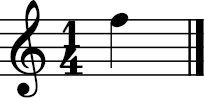

In [31]:
f.show()

即可看到它。音符的默认时长是四分音符。后面我们会教你设定其他的音符时长。注意乐谱中的谱号，否则你不知道这个音符确实是`F5`

如果你想听到它（而且你用的是Windows或Unix或旧版Mac（10.5及以下）），输入：

In [32]:
f.show('midi')

使用`f.octave`时不需要括号，但调用`f.show()`时必须要一对括号，即使里面没有内容也要有括号（这种情况下，music21会采用默认模式显示音符，通常是`musicxml`）

`.show()`是`Note`对象的一个方法，而`.octave`是属性。调用方法时必须带括号，括号里面可以输入一些其他变量（称为参数）来控制这个方法。例如，把`bflat`升高大三度：

In [33]:
d = bflat.transpose("M3")
d

<music21.note.Note D>

In [34]:
bflat

<music21.note.Note B->

`transpose()`方法不会改变原来的音符，而是返回一个新音符对象作为移调操作的结果。

如果想就地修改`bflat`对象，可以加入`inPlace = True`参数：

In [35]:
bflat.transpose("P4", inPlace=True)
bflat

<music21.note.Note E->

那么现在`bflat`成为了一个糟糕的变量名。你可以输入`eflat=bflat`，但你也可以不这么频繁地做这件事。

顺便说一下，music21支持一些非常奇葩的音程。例如，将`d`升高一个减减六度：

In [36]:
whatNoteIsThis = d.transpose('dd6')
whatNoteIsThis

<music21.note.Note B--->

从未见过的`B---`！我们来查看这个音符的`.pitch.accidental.alter `和`.pitch.accidental.name`

In [37]:
whatNoteIsThis.pitch.accidental.alter

-3.0

In [38]:
whatNoteIsThis.pitch.accidental.name

'triple-flat'

最后一件事：不是所有音符都有变调符号，例如`d`就没有。所以d的`accidental`为`None`，它是一个不输出任何内容的特殊对象：

In [39]:
d.pitch.accidental

如果你要确认它是None，请输入：

In [40]:
print(d.pitch.accidental)

None


既然`d.accidental`是`None`，那么`d.accidental.name`也是`None`吗？

In [41]:
d.pitch.accidental.name

AttributeError: 'NoneType' object has no attribute 'name'

不是，而是产生一个错误。这是由于`None`不是`Accidental`对象，而是`NoneType`对象，而它没有`name`属性。

如果在交互式命令行写代码，产生一个错误是小事，但如果这段代码在一个大程序中运行，则错误通常会导致程序崩溃。所以我们要确保音符有`Accidentals`属性，才显示它的名称

In [42]:
if d.pitch.accidental is not None:
    print(d.pitch.accidental.name)

这种方法更安全，因为我们只在`d.pitch.accidental`不是`None`时，才输出`d.pitch.accidental.name`。由于刚才它是`None`，Python就不会运行第二行代码。

如果因为某种原因，`d`没有`pitch`属性，我们可能也要测试它是不是`None`，然后才能使用`.pitch.accidental`

例如休止符`Rest`

In [43]:
r = note.Rest()

记得在创建`note.Rest`时带一对括号，否则会发生奇怪的事情。

同样用`.show()`查看

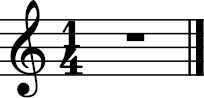

In [44]:
r.show()

但是如果把它作为midi文件播放，休止符是没有声音的。

`Rest`对象没有`pitch`属性，所以也没有`.pitch.accidental`

In [45]:
r.pitch

AttributeError: 'Rest' object has no attribute 'pitch'

最后一件事情：我们从未使用变量名`note`。**千万不要这样做**。如果你输入以下代码：

In [46]:
note=note.Note("C#3")

你把一个对象储存为`note`，但是又需要使用`note`模块来创建新的`Note`对象，而现在没办法访问`note`模块了（这就是“污染命名空间”）的后果。所以请不要用`note`作为变量名（`pitch`、`scale`、`key`、`clef`等同理，你可以使用`myNote`和`myClef`来避免）。

下一章：[用户指南，第3章：音高，时长与音符](03.ipynb)